# 1. Consider the dataset
#Importing required libraries

In [14]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.preprocessing import LabelEncoder

from sklearn import tree
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv('adult.csv') 

In [25]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [26]:
columns_to_drop = ['education', 'fnlwgt','native-country']

In [27]:
df=df.drop(columns_to_drop,axis=1)

In [28]:
df

,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,income
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,<=50K
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,<=50K
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,>50K
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,>50K
4,18,?,10,Never-married,?,Own-child,White,Female,0,0,30,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,<=50K
48838,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,>50K
48839,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,<=50K
48840,22,Private,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,<=50K


# 2. Formulate a hypotheses

In [ ]:
#H0: There is no association between the two categorical variables (gender and income). Gender does not impact an individual's ability to earn more.
#H1: There is an association between the two variables(gender and income.
#Since, we are having 2 categorical variables we will be using Chi-square test of independence to test our hypothesis.


# 3. Analyze your Dataset

In [29]:
df.isnull().sum()

age                0
workclass          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
income             0
dtype: int64

In [30]:
df.describe() #preliminary EDA

,age,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,10.078089,1079.067626,87.502314,40.422382
std,13.710510,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [31]:
df.info()  #preliminary EDA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   educational-num  48842 non-null  int64 
 3   marital-status   48842 non-null  object
 4   occupation       48842 non-null  object
 5   relationship     48842 non-null  object
 6   race             48842 non-null  object
 7   gender           48842 non-null  object
 8   capital-gain     48842 non-null  int64 
 9   capital-loss     48842 non-null  int64 
 10  hours-per-week   48842 non-null  int64 
 11  income           48842 non-null  object
dtypes: int64(5), object(7)
memory usage: 4.5+ MB


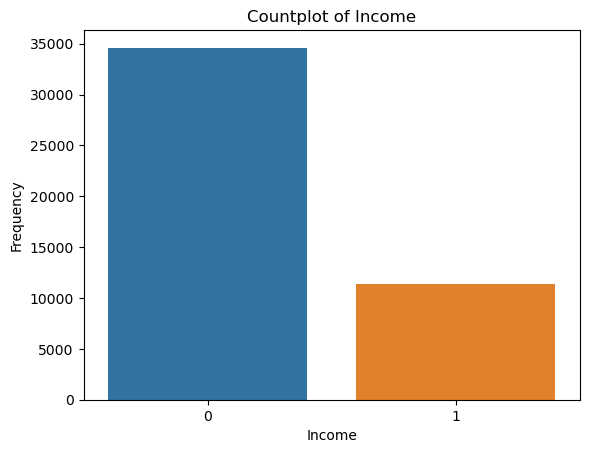

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt


# Plot a categorical column and its frequency using a countplot#shows imbalanced dataset.w
sns.countplot(x='income', data=df)
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Countplot of Income')
plt.show()

In [8]:
num_duplicates = df.duplicated().sum()  #checking for duplicate values
print("Number of duplicate rows: ", num_duplicates) #why are we getting duplicates?

Number of duplicate rows:  52


<AxesSubplot:xlabel='age'>

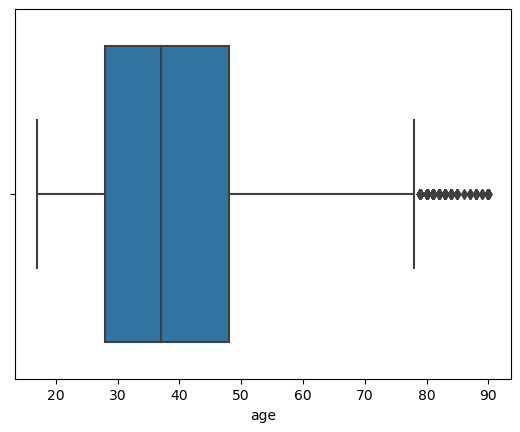

In [27]:
import seaborn as sns

# Plot box plots for each column
sns.boxplot(x=df.age, data=df)


In [28]:
# Plot box plots for each column

sns.boxplot(x=df.capital-loss, data=df)
sns.boxplot(x=df.hours-per-week, data=df)
sns.boxplot(x=df.educational-num, data=df)



AttributeError: 'DataFrame' object has no attribute 'capital'

<AxesSubplot:xlabel='capital-gain'>

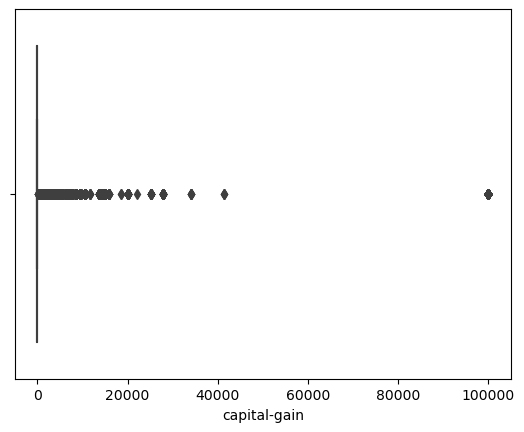

In [32]:
sns.boxplot(x="capital-gain", data=df)

<AxesSubplot:xlabel='capital-loss'>

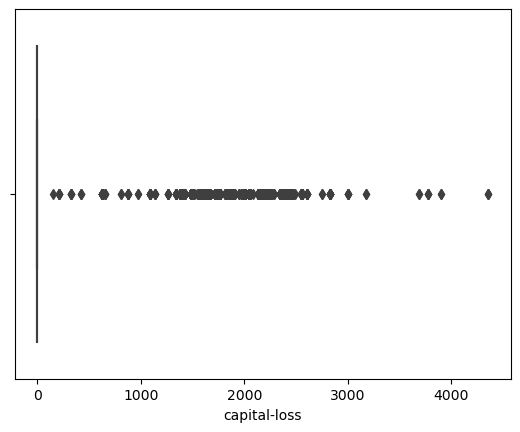

In [33]:
sns.boxplot(x="capital-loss", data=df)

In [34]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [35]:
num_zeros = (df['capital-loss'] == 0).sum()
print('Number of zeroes in the column:', num_zeros)

Number of zeroes in the column: 46560


In [38]:
df.info()
46560/48842


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


0.9532779165472339

<AxesSubplot:xlabel='hours-per-week'>

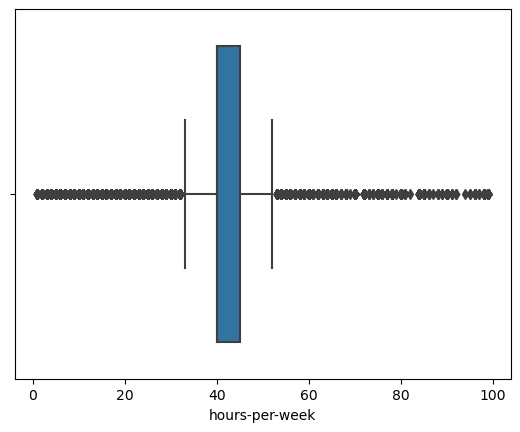

In [39]:
sns.boxplot(x="hours-per-week", data=df) #too many outliers

# 4. Preprocess your data

In [40]:
df.isnull().sum() #no missing or null values

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [32]:
df.replace('?', np.nan, inplace=True) 
#we noticed through preliminary look that there were some rows that had "?".
#to clean the dataset we removed those rows as shown below

In [33]:
df.dropna(inplace=True) #Drop rows with missing values:

In [34]:
#Convert categorical variables to numerical using one-hot encoding: 
#The reason for using one-hot encoding is explained in the word filein the question '5. Will you need to Vectorize?''
df = pd.get_dummies(df, columns=['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender'],drop_first=True)


In [35]:
df.head()
#just have a look after conversion
#what is the impact of increasing the number of columns? How to control this impact?

,age,educational-num,capital-gain,capital-loss,hours-per-week,income,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Male
0,25,7,0,0,40,<=50K,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1
1,38,9,0,0,50,<=50K,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
2,28,12,0,0,40,>50K,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,44,10,7688,0,40,>50K,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
5,34,6,0,0,30,<=50K,0,1,0,0,...,1,0,0,0,0,0,0,0,1,1


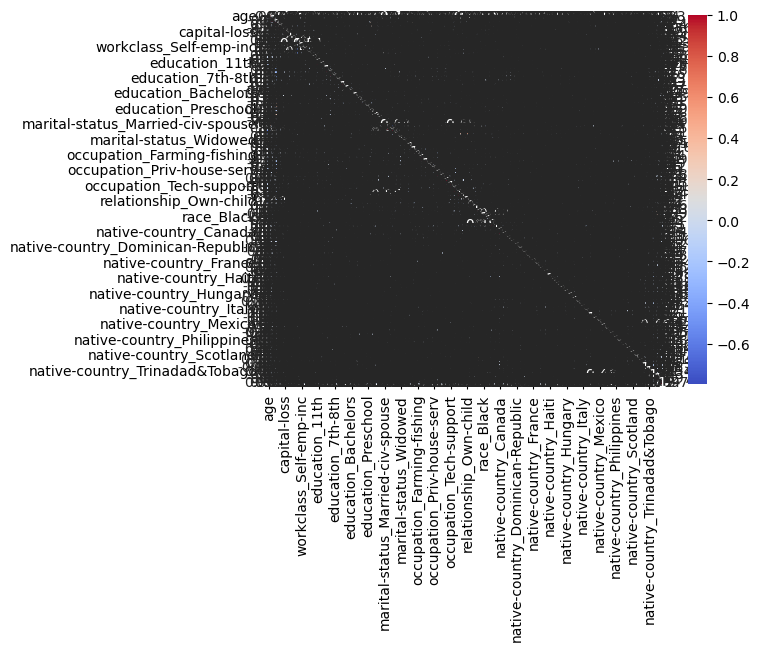

In [60]:
# Create correlation matrix
corr_matrix = df.corr()

# Plot correlation matrix using heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.show()

In [36]:
# Convert income column to 0 and 1
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})

# 7. Perform your Train and Test Split

In [37]:
X = df.drop('income', axis=1)
y = df['income']
#Split the data into features and target variable:


In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Split the data into training and testing sets:

# Scale the numeric features using StandardScaler:

In [39]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.select_dtypes(include=['float64', 'int64']))
X_test_scaled = scaler.transform(X_test.select_dtypes(include=['float64', 'int64']))


# 6. Use Naive Bayes model

In [40]:
# Import libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


In [41]:
# Train the model
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

# 8. Use two examples to test your hypothesis

# First Method

In [ ]:
print(model.predict([[40, 10, 6, 0,1]]))  #clarify with professor

# Second method

In [119]:

from scipy.stats import chi2_contingency

# Load the data from the adult.csv file
data = pd.read_csv('adult.csv')

# Create a contingency table of gender and income
contingency_table = pd.crosstab(data['gender'], data['income'])

# Perform the chi-square test of independence
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

# Compare p-value with significance level (e.g., 0.05) to determine statistical significance
if p_val < 0.05:
    print(" ")
    print("Based on our hypothesis test conducted we can reject the null hypothesis.")
    print("Thus, we can state there is sufficient evidence to conclude there is a significant association or dependence between the two categorical variables gender and income.")
else:
    print("There is not enough evidence to reject the null hypothesis.")


Chi-square statistic: 2248.847679013691
P-value: 0.0
Degrees of freedom: 1
Expected frequencies: [[12317.54964989  3874.45035011]
 [24837.45035011  7812.54964989]]
 
Based on our hypothesis test conducted we can reject the null hypothesis.
Thus, we can state there is sufficient evidence to conclude there is a significant association or dependence between the two categorical variables gender and income.


# 9. Now use your test data to computer the accuracy of the model

In [46]:
# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8190507222765288


In [45]:
# Evaluate the model - training accuracy
y_pred = model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8231955683484494


In [43]:
#Confusion Matrix  

from sklearn.metrics import confusion_matrix  
cm = confusion_matrix(y_test, y_pred)  

print(cm) 

[[5825 1037]
 [ 629 1716]]


# 10. Can it be improved? Explain how

In [ ]:
#1.Changing the train test split ratio does not impact the accuracy much.

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
#Split the data into training and testing sets:

In [80]:
# Train the model
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [81]:
# Evaluate the model - testing accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7911107835188325


In [44]:
# Evaluate the model - training accuracy
y_pred = model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8231955683484494


In [ ]:
#2.Changing the train test split ratio does not impact the accuracy much.

In [ ]:
#Training and testing accuracy both are almost the same.